#Solar Panel Detection with GeoAI
This notebook demonstrates how to automatically detect solar panels from high-resolution aerial imagery using GeoAI techniques.

##What is GeoAI?
GeoAI (Geospatial Artificial Intelligence) is the fusion of geospatial data with artificial intelligence and machine learning methods. It enables the automated analysis of satellite, aerial, and drone imagery to detect patterns, classify features, and make spatial predictions at scale.



#1. Install Required Library

In [1]:
%pip install geoai-py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 186.1/186.1 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.3/90.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.1/568.1 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.2/882.2 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/2

#2. Import GeoAI

In [2]:
import geoai

# 3. Download Data

The case study focuses on Davis, California, using a publicly available georeferenced .tif file containing visible rooftop solar panels.

In [3]:
raster_url = "https://huggingface.co/datasets/giswqs/geospatial/resolve/main/solar_panels_davis_ca.tif"
raster_path = geoai.download_file(raster_url)

===== RASTER INFORMATION: solar_panels_davis_ca.tif =====
Driver: GTiff
Dimensions: 6711 x 3242 pixels
Number of bands: 3
Data type: uint8
Coordinate Reference System: EPSG:3857
Georeferenced Bounds: BoundingBox(left=-13556075.706688922, bottom=4657729.5446374295, right=-13555574.76898035, top=4657971.533802349)
Pixel Resolution: 0.07464427187774597, 0.07464193859333511
NoData Value: None

----- Band Statistics -----
Band 1:
  Min: 0.00
  Max: 255.00
  Mean: 104.00
  Std Dev: 64.62
Band 2:
  Min: 0.00
  Max: 255.00
  Mean: 102.47
  Std Dev: 58.59
Band 3:
  Min: 0.00
  Max: 255.00
  Mean: 112.06
  Std Dev: 46.38


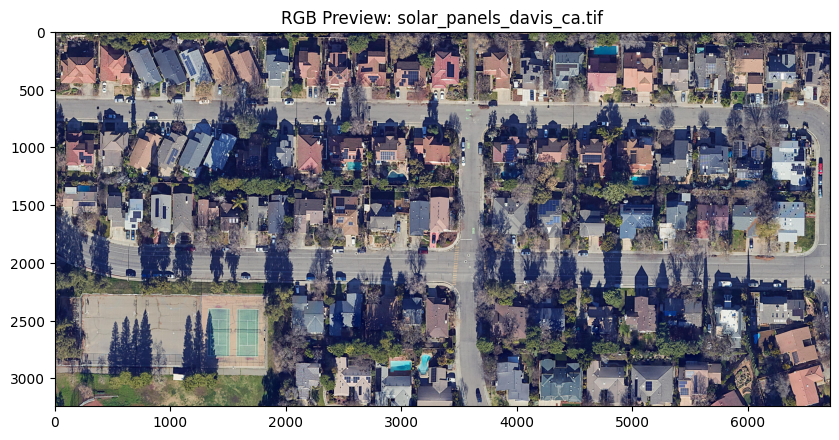

In [4]:
geoai.print_raster_info(raster_path)

# 4. Visualize the Aerial Image on the map

In [5]:
geoai.view_raster(raster_url)

# 5. Initialize the Solar Panel Detection Model

In [6]:
detector = geoai.SolarPanelDetector()

Model path not specified, downloading from Hugging Face...


solar_panel_detection.pth:   0%|          | 0.00/176M [00:00<?, ?B/s]

Model downloaded to: /root/.cache/huggingface/hub/models--giswqs--geoai/snapshots/6698907683cad47f1b85bf1ef4698ea086ba51a0/solar_panel_detection.pth
Model loaded successfully


# 6. Generate Solar Panel Masks
Detect solar panels using the pretrained model:

In [7]:
output_path = "solar_panel_masks.tif"

In [8]:
masks_path = detector.generate_masks(
    raster_path,
    output_path=output_path,
    confidence_threshold=0.4,
    mask_threshold=0.5,
    min_object_area=100,
    overlap=0.25,
    chip_size=(400, 400),
    batch_size=4,
    verbose=False,
)

Dataset initialized with 11 rows and 23 columns of chips
Image dimensions: 6711 x 3242 pixels
Chip size: 400 x 400 pixels
Overlap: 25.0% (stride_x=300, stride_y=300)
CRS: EPSG:3857
Processing raster with 64 batches


100%|██████████| 64/64 [29:46<00:00, 27.91s/it]


Masks with confidence values saved to solar_panel_masks.tif


# 7. Visualize Detected Masks

In [9]:
geoai.view_raster(
    output_path,
    indexes=[2],
    colormap="autumn",
    layer_name="Solar Panels",
    basemap=raster_url,
)

#8. Convert Masks to Vector Format

In [10]:
gdf = geoai.orthogonalize(
    input_path=masks_path, output_path="solar_panel_masks.geojson", epsilon=0.2
)

Processing 82 features...


Converting features: 100%|██████████| 82/82 [00:01<00:00, 61.58shape/s]


Saving to solar_panel_masks.geojson...
Done!


# 9. Visualize Detected Solar Panels
this code shows the initial results

In [11]:
geoai.view_vector_interactive(gdf, tiles=raster_url)

# 10. Calculate Geometric Properties

In [12]:
gdf = geoai.add_geometric_properties(gdf)
gdf.head()

,geometry,value,area_m2,length_m,perimeter_m,area_bbox_m2,area_convex_m2,area_filled_m2,major_length_m,minor_length_m,eccentricity,orientation,elongation,extent,solidity,complexity
0,"POLYGON ((-13555603.955 4657949.439, -13555601...",255,13.848780,17.773420,17.773420,13.848780,13.848780,13.848780,6.871240,2.015470,0.956014,90.0,3.409249,1.000000,1.000000,1.347288
1,"POLYGON ((-13555896.001 4657949.363, -13555894...",255,10.052594,17.996987,17.996987,10.052594,10.052594,10.052594,7.691523,1.306970,0.985457,90.0,5.885002,1.000000,1.000000,1.601238
2,"POLYGON ((-13555892.828 4657948.816, -13555889...",255,43.794885,27.056748,27.056748,44.195465,43.995175,43.794885,8.012690,5.515684,0.725361,90.0,1.452710,0.990936,0.995447,1.153344
3,"POLYGON ((-13555589.94 4657947.647, -13555588....",255,44.195802,32.478562,32.478562,51.516271,48.477006,44.195802,9.257522,5.564802,0.799165,90.0,1.663585,0.857900,0.911686,1.378165
4,"POLYGON ((-13555760.559 4657949.141, -13555760...",255,9.995438,14.032941,14.032941,11.432909,10.627814,9.995438,4.030791,2.836394,0.710515,0.0,1.421097,0.874269,0.940498,1.252111


###Number of detected panels:

In [22]:
print(len(gdf))

81


In [14]:
geoai.view_vector_interactive(gdf, column="elongation", tiles=raster_url)

# 11. Filter Out False Positives
Keep only plausible solar panels:

In [15]:
gdf_filter = gdf[(gdf["elongation"] < 10) & (gdf["area_m2"] > 5)]
print(len(gdf_filter))

70


# 12. Visualize Final Results
by area

In [16]:
geoai.view_vector_interactive(gdf_filter, column="area_m2", tiles=raster_url)

###Outline only:

In [17]:
geoai.view_vector_interactive(
    gdf_filter, style_kwds={"color": "red", "fillOpacity": 0}, tiles=raster_url
)

#13. Analyze Area Distribution
Histogram of panel areas:

<Axes: >

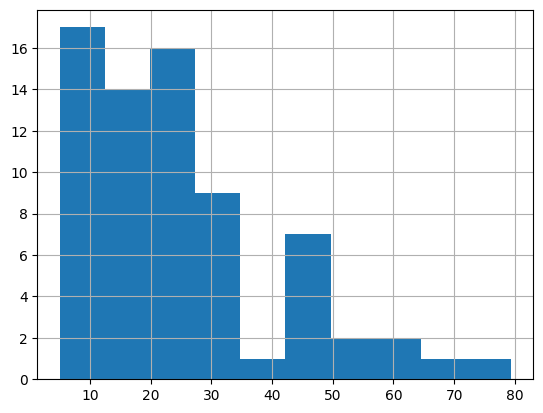

In [18]:
gdf_filter["area_m2"].hist()

Descriptive statistics:

In [19]:
gdf_filter["area_m2"].describe()

,area_m2
count,70.000000
mean,25.090257
std,16.236111
min,5.070150
25%,13.155055
50%,22.587623
75%,32.609032
max,79.352841


Total area covered by panels:

In [20]:
gdf_filter["area_m2"].sum()

np.float64(1756.3179861086749)

# 14. Save Final Results

In [21]:
gdf_filter.to_file("solar_panels.geojson")